In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Churn_model.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10344 entries, 0 to 10343
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        10344 non-null  int64  
 1   SeniorCitizen     10344 non-null  int64  
 2   Partner           10344 non-null  int64  
 3   Dependents        10344 non-null  int64  
 4   MultipleLines     10344 non-null  int64  
 5   InternetService   10344 non-null  int64  
 6   OnlineSecurity    10344 non-null  int64  
 7   OnlineBackup      10344 non-null  int64  
 8   DeviceProtection  10344 non-null  int64  
 9   TechSupport       10344 non-null  int64  
 10  StreamingTV       10344 non-null  int64  
 11  StreamingMovies   10344 non-null  int64  
 12  Contract          10344 non-null  float64
 13  PaperlessBilling  10344 non-null  int64  
 14  PaymentMethod     10344 non-null  int64  
 15  Churn             10344 non-null  int64  
 16  tenure            10344 non-null  float6

In [4]:
df.drop(['Unnamed: 0'],axis = 1,inplace = True)

In [5]:
df.head()

,SeniorCitizen,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn,tenure,MonthlyCharges,TotalCharges
0,0,0,0,0,1,2,0,0,0,0,0,0.0,1,1,1,0.758426,-0.278080,0.286083
1,0,1,0,2,1,0,0,0,0,0,2,0.0,1,2,1,1.613592,-0.873018,0.213067
2,0,1,0,1,0,0,2,0,0,0,2,0.0,1,0,1,-0.911184,0.692433,-0.646863
3,1,1,0,0,1,2,0,0,0,0,0,0.0,1,0,1,-0.829739,-1.486236,-0.888808
4,0,0,0,1,0,0,0,0,0,0,0,0.0,1,3,1,0.391927,0.057611,0.212957


In [6]:
df.columns

Index(['SeniorCitizen', 'Partner', 'Dependents', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Churn', 'tenure',
       'MonthlyCharges', 'TotalCharges'],
      dtype='object')

In [7]:
y = pd.DataFrame(df.loc[:,['Churn']])
X = pd.DataFrame(df.drop(['Churn'],axis = 1))

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 8)

In [10]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression() 

In [11]:
model = log.fit(X_train,y_train)

C:\Users\aswin\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [12]:
y_pred = model.predict(X_test)

In [13]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [14]:
accuracy_score(y_test,y_pred)

0.7409376510391493

In [27]:
print(confusion_matrix(y_test,y_pred))

[[675 335]
 [201 858]]


In [16]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.77      0.67      0.72      1010
           1       0.72      0.81      0.76      1059

    accuracy                           0.74      2069
   macro avg       0.74      0.74      0.74      2069
weighted avg       0.74      0.74      0.74      2069



In [17]:
from sklearn.metrics import roc_curve,auc,roc_auc_score

In [18]:
roc_auc_score(y_pred,y_test)

0.7448716255784312

In [19]:
y_pred_proba = model.predict_proba(X_test)

In [20]:
y_pred_proba

array([[0.19809185, 0.80190815],
       [0.4432163 , 0.5567837 ],
       [0.55288313, 0.44711687],
       ...,
       [0.94001447, 0.05998553],
       [0.26031083, 0.73968917],
       [0.38634955, 0.61365045]])

In [21]:
fpr,tpr,threshold = roc_curve(y_pred,y_pred_proba[:,1])

In [22]:
roc_auc = auc(fpr,tpr)

In [23]:
roc_auc

1.0

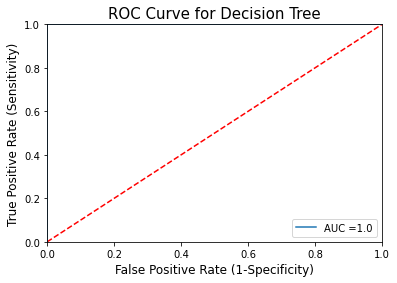

In [26]:
plt.title('ROC Curve for Decision Tree',size = 15)
plt.xlabel('False Positive Rate (1-Specificity)',size = 12)
plt.ylabel('True Positive Rate (Sensitivity)',size =12)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.plot(fpr, tpr, label = 'AUC =' +str(roc_auc))
plt.legend(loc=4) #Location of label
plt.show()